`Интерполяция` : Общее наименование вычислительно-математических способов определить(восстановить) исходную функцию по заданным известным точкам. Попытка воссоздать неизвестные точки, которые должны лежать между известными этой функцией.\
`Экстрополяция` : Попытка определить неизвестные точки, которые должны лежать вне диапазона известных значений.

`Аппроксимация` : Способ выбрать из семейства «простых» функций приближение для «сложной» функции на отрезке, при этом ошибка не должна превышать определенного предела. 

`Функция потеря (loss function)` : Функция, которая показывает насколько действительные значения откланяются от тех, что были созданы пробной функцией.

`Регрессия` : Способ выбрать функцию, что будет наилучшим(оптимальным) образом описывать точки. Лучшая - та что минимизирует функцию потерь, то есть значения ошибки будет минимально возможным в данной ситуации.

---------------------------

**`Линейная регрессия`** :  Линейная функция зависимости целевой переменной от одной или нескольких других переменных(предикторов)
$$
y = wX+b
$$
$y$ - Целевое значение, которые необхидимо предсказать. (target)\
$X$ - Признак/Признаки.\
$w$ - Вес при признаках. (Коэффициент наклона) (coef_)\
$b$ - Свободный член. (Коэффициент сдвига) (intercept_) \

Цель регрессии — найти коэффициенты этой линейной комбинации, и тем самым определить регрессионную функцию, что наилучшим образом будет описывать заданную тенденцию.\

Определить loss-функцию -> задать начальные параметры весов -> определить метод оптимизации -> минимизировать ошибку -> оценить по метрикам.

**loss-функции**
`MAE`:\
`MSE`:\
**Методы Оптимизации:**\
`Аналитическая формула - Метод наименьших квадратов`:\
`Градиентный спуск (GD)` : При использовании градиентного спуска признаки должны быть масштабированы(StandardScaler) для сокращения времени сходимости.

**Метрики** :
`MSE` \
`rMSE`\
`MAE`\
`R$^2$`

-----

# Ordinary List Squares

$$
\vec{w} = (X^T X)^{-1} X^T \vec{y}
$$
- $\vec{w}$ – (искомый) вектор весов  
- $X$ – матрица признаков  
- $X^T$ – транспонированная матрица признаков  
- $\vec{y}$ – вектор целевых значений  
- ${}^{-1}$ – обратная матрица  


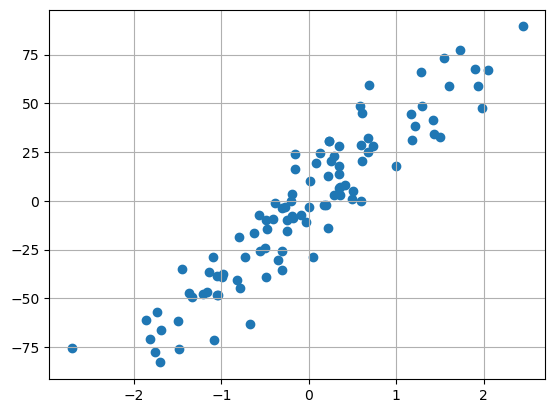

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
X, y = make_regression(n_samples=100, n_features=1, n_informative=1, noise=0.1, random_state=42)

plt.grid()
plt.scatter(X, y);

In [41]:
# Столбец единиц
ones = np.ones((X.shape[0], 1))
X = np.hstack((ones, X))

In [42]:
X.shape, y.shape

((100, 2), (100,))

**SVD?? - Singular Value Decomposition**

In [46]:
np.linalg.lstsq(X, y, rcond=1e-6)[0]

array([-0.98565497, 36.54065393])

In [43]:
np.linalg.pinv(X).dot(y)

array([-0.98565497, 36.54065393])

In [24]:
X.T

array([[ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+0

In [25]:
X.T.dot(X)

array([[100.        ,  -4.52283268],
       [ -4.52283268, 103.78659879]])

In [26]:
X.T @ X

array([[100.        ,  -4.52283268],
       [ -4.52283268, 103.78659879]])

In [27]:
# Детерминант не 0 => Не выраждена
np.linalg.det(X.T @ X)

10358.203863238285

In [28]:
# Нахождение обратной матрицы
np.linalg.inv(X.T @ X)

array([[0.01001975, 0.00043664],
       [0.00043664, 0.00965418]])

In [29]:
np.linalg.inv(X.T @ X)@X.T@y

array([-0.98565497, 36.54065393])

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
model = LinearRegression()
model.fit(X, y)
model.coef_, model.intercept_,

(array([ 0.        , 36.54065393]), -0.9856549674694199)

# Gradient Descent

## Градиентный спуск параболы

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class ParabolGD:
    def __init__(self, X, point, eps=0.0001, learning_rate=0.1):
        self.X = X
        self.eps = eps
        self.learning_rate = learning_rate
        self.point = point
        self.__points_list = []
        
    def __func(self, x):
        return x**2
        
    def __grad(self, x):
        return 2*x
        
    def GD(self, logging=False):
        print(f'Стартовая точка: {point}')
        i = 1
        while True:
            next_point = self.point - self.__grad(self.point)*self.learning_rate\

            if logging:
                print(f'Итерация №{i}, текущая точка: {next_point}')
                print('------------------------------------------------')
            
            self.__points_list.append(self.point)
            if abs(self.point-next_point) <= self.eps:
                break
            self.point = next_point
            i+=1

        self.__points_list = np.array(self.__points_list)
        plt.grid()
        plt.scatter(self.__points_list, self.__func(self.__points_list), c='r')
        plt.plot(self.X, self.__func(self.X))
    

Стартовая точка: 91.91919191919195
Итерация №1, текущая точка: 73.53535353535355
------------------------------------------------
Итерация №2, текущая точка: 58.82828282828284
------------------------------------------------
Итерация №3, текущая точка: 47.06262626262627
------------------------------------------------
Итерация №4, текущая точка: 37.65010101010101
------------------------------------------------
Итерация №5, текущая точка: 30.120080808080807
------------------------------------------------
Итерация №6, текущая точка: 24.096064646464647
------------------------------------------------
Итерация №7, текущая точка: 19.276851717171716
------------------------------------------------
Итерация №8, текущая точка: 15.421481373737373
------------------------------------------------
Итерация №9, текущая точка: 12.337185098989899
------------------------------------------------
Итерация №10, текущая точка: 9.869748079191918
------------------------------------------------
Итерация 

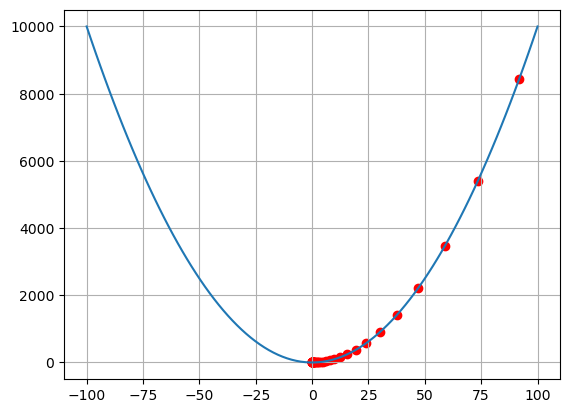

In [36]:
X = np.linspace(-100, 100, 100)
point = point = np.random.choice(X)

ParabolGD(X, point).GD(True)

## Gradient Descend с MSE

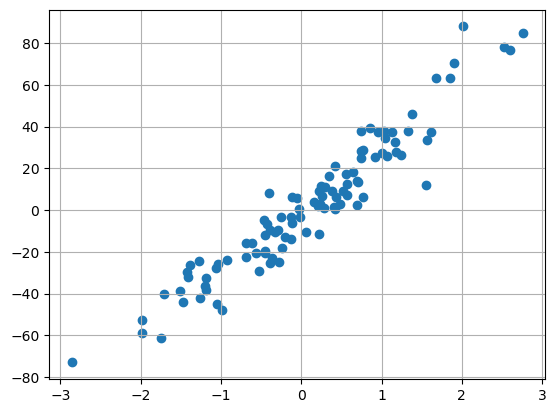

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
X, y = make_regression(n_samples=100, n_features=1, n_informative=1, noise=10, random_state=21)

plt.grid()
plt.scatter(X, y);

In [2]:
X.shape, y.shape

((100, 1), (100,))

In [36]:
class GDRegression():
    def __init__(self, eps=0.0001, learning_rate=0.1):
        self.eps = eps
        self.learning_rate = learning_rate
        self.coef_ = None
        self.intercept_ = None

    @staticmethod
    def mserror(X, w, b, y):
        y_pred = w * X[:, 0] + b
        return np.sum((y - y_pred) ** 2) / len(y_pred)
    
    @staticmethod
    def grad(X, y, w, b):
        y_pred = w * X[:, 0] + b
        dw = 2/len(X)*np.sum((y - y_pred) * (-X[:, 0]))
        db = 2/len(X)*np.sum((y - y_pred)) * (-1)
        return np.array([dw, db])
        
    def fit(self, X, y, logging=False):
        w = 0
        b = 0
        
        next_w = w
        next_b = b

        i=0
        
        while True:
            cur_w = next_w
            cur_b = next_b
            
            next_b = cur_b - self.learning_rate * self.grad(X,y, cur_w, cur_b)[1]
            next_w = cur_w - self.learning_rate * self.grad(X,y, cur_w, cur_b)[0]
            
            if logging:
                print(f"Итерация: {i}")
                print(f"Текущая точка {cur_w, cur_b}| Следующая точка {next_b, next_w}")
                print(f"MSE {self.mserror(X, cur_w, cur_b, y)}")
                print("--------------------------------------------------------")
            
                i+=1
            if (abs(cur_w - next_w) <= self.eps) and (abs(cur_b - next_b) <= self.eps):
                break
            self.coef_ = next_w
            self.intercept_ = next_b

In [4]:
GD = GDRegression()
GD.fit(X, y, True)

Итерация: 0
Текущая точка (0, 0)| Следующая точка (0.47591397282289, 6.669703347380118)
MSE 1060.2664389253528
--------------------------------------------------------
Итерация: 1
Текущая точка (6.669703347380118, 0.47591397282289)| Следующая точка (0.7173544518830667, 11.79871781424048)
MSE 665.0897053875981
--------------------------------------------------------
Итерация: 2
Текущая точка (11.79871781424048, 0.7173544518830667)| Следующая точка (0.8033920244602116, 15.745540491677053)
MSE 431.94387303941477
--------------------------------------------------------
Итерация: 3
Текущая точка (15.745540491677053, 0.8033920244602116)| Следующая точка (0.7897962740986573, 18.784739225901923)
MSE 294.04977078371815
--------------------------------------------------------
Итерация: 4
Текущая точка (18.784739225901923, 0.7897962740986573)| Следующая точка (0.7154487674371603, 21.126701666318855)
MSE 212.27170135771897
--------------------------------------------------------
Итерация: 5
Текуща

In [5]:
GD.coef_, GD.intercept_

(29.12073965311747, -0.660758579362936)

In [9]:
from sklearn.linear_model import SGDRegressor

In [10]:
SGD = SGDRegressor()
SGD.fit(X, y)
SGD.coef_, SGD.intercept_

(array([29.08678869]), array([-0.62901321]))

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
LR = LinearRegression()
LR.fit(X, y)
LR.coef_, LR.intercept_

(array([29.12105509]), -0.6612641228869567)

**Метрики**

In [13]:
from sklearn.metrics import (mean_absolute_error,
                            mean_squared_error,
                            root_mean_squared_error,
                            r2_score)

In [14]:
mean_absolute_error(y, LR.predict(X))

7.404045172044802

In [15]:
np.mean(np.abs(y-LR.predict(X)))

7.404045172044802

In [16]:
mean_squared_error(y, LR.predict(X))

90.69597015602255

In [17]:
np.mean((y - LR.predict(X))**2)

90.69597015602255

In [18]:
root_mean_squared_error(y, LR.predict(X))

9.523443188050347

In [19]:
np.sqrt(np.mean((y - LR.predict(X))**2))

9.523443188050347

In [20]:
r2_score(y, LR.predict(X))

0.9139999822265741

# 